<a href="https://colab.research.google.com/github/noctxrne/DSA-ICT/blob/main/weekend_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
winequality=pd.read_csv("/content/winequality-red.csv")


In [3]:
winequality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
winequality.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [6]:
winequality['quality'].value_counts(normalize=True)

,proportion
quality,
5,0.425891
6,0.398999
7,0.124453
4,0.033146
8,0.011257
3,0.006254


In [7]:
winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

<Axes: >

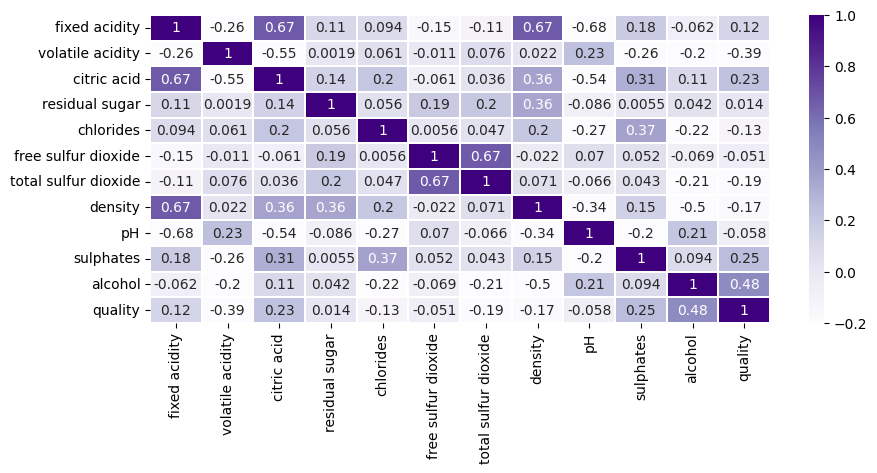

In [9]:
corr_matrix=winequality.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corr_matrix,vmin=-.2,vmax=1,annot=True,linewidths=0.2,cmap='Purples')

In [10]:
x=winequality.drop(['quality'],axis=1)
y=winequality['quality']

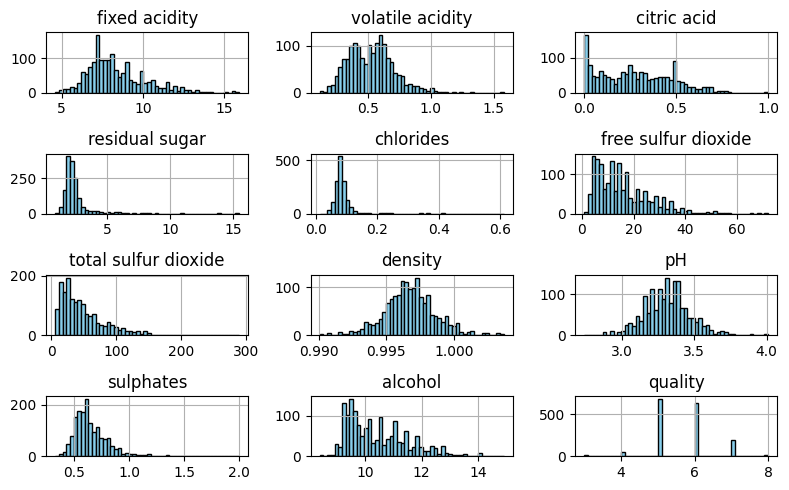

In [11]:
# 2 rows x 3 cols subplot grid (perfect for 6 columns)
fig, axes = plt.subplots(4, 3, figsize=(8, 5))
axes = axes.flatten()

cols = winequality.select_dtypes(include=[np.number]).columns

for i, col in enumerate(cols):
    winequality[col].hist(bins=50, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## **Handling Skewness**

In [12]:
#handing ones that are skewed
skewed_features = ['residual sugar', 'total sulfur dioxide', 'chlorides']
for col in skewed_features:
    winequality[col] = np.log1p(winequality[col])  # log1p handles zeros safely

## **Train Test Split**

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

## **Scaling**

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std_scaler = StandardScaler()
minmaxscaler = MinMaxScaler()


x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)

In [15]:
x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)

## **Plotting box plot to check for Outliers in x_train and x_test**

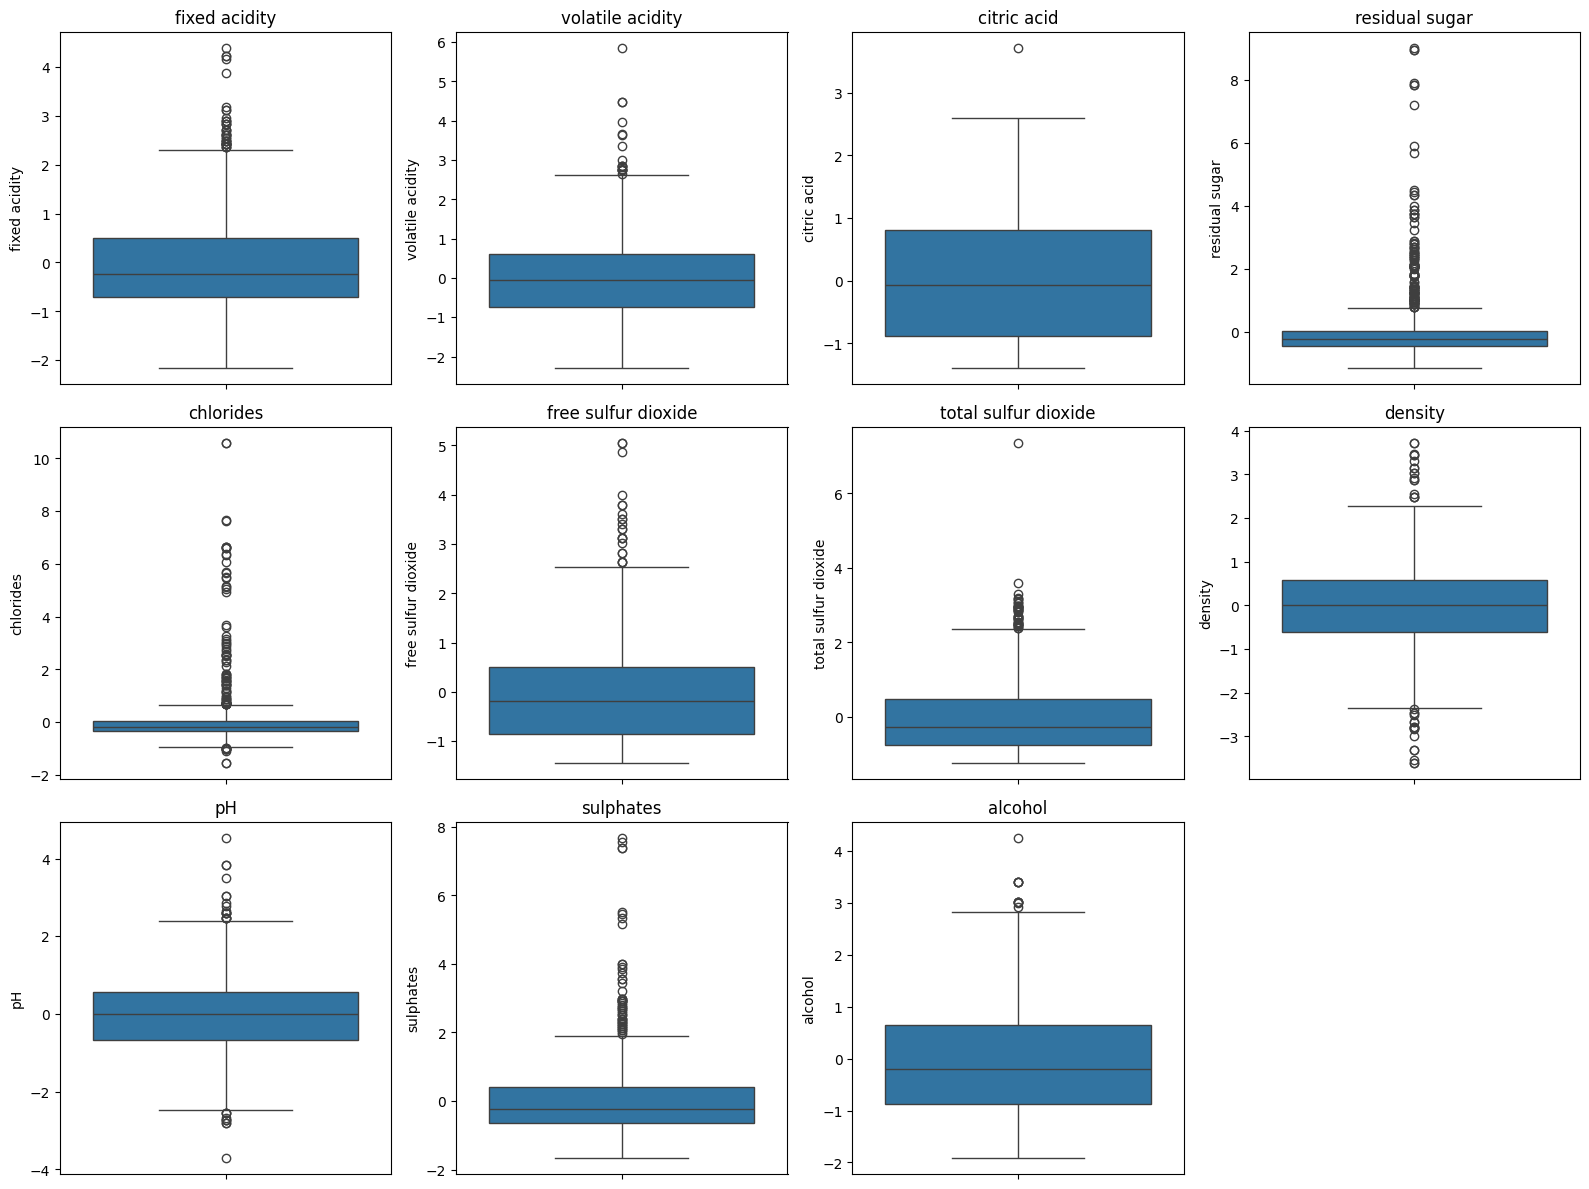

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# X train outlier plot

cols = x_train.columns
n_cols = 4  # number of plots per row
n_rows = (len(cols) + n_cols - 1) // n_cols  # calculate rows

plt.figure(figsize=(16, 4*n_rows))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=x_train[col])
    plt.title(col)

plt.tight_layout()
plt.show()


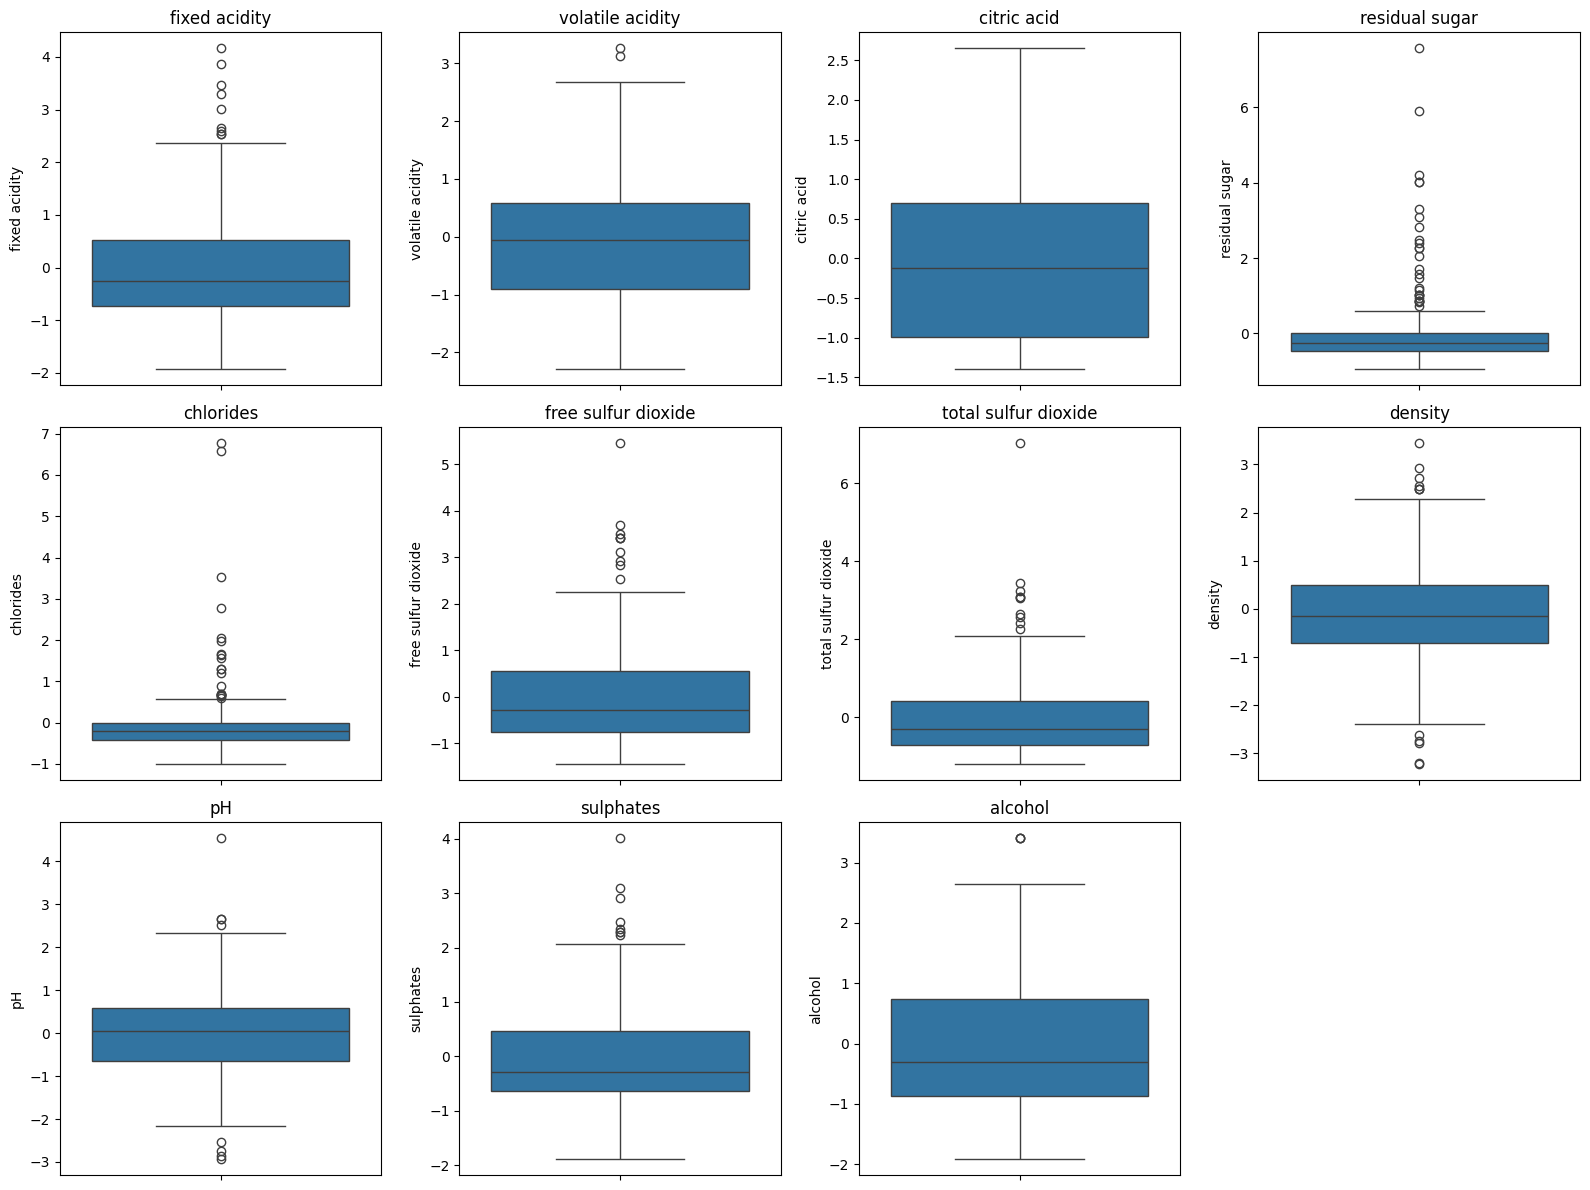

In [17]:
# X test outlier plot
cols = x_test.columns
n_cols = 4  # number of plots per row
n_rows = (len(cols) + n_cols - 1) // n_cols  # calculate rows

plt.figure(figsize=(16, 4*n_rows))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=x_test[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## **Clipping outliers of x train data and x test data**

In [18]:
# Copy to avoid changing original
x_train_clipped = x_train.copy()
x_test_clipped = x_test.copy()

for col in x_train_clipped.columns:
    Q1 = x_train_clipped[col].quantile(0.25)
    Q3 = x_train_clipped[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Clip values outside bounds
    x_train_clipped[col] = x_train_clipped[col].clip(lower, upper)
    x_test_clipped[col] = x_test_clipped[col].clip(lower, upper)

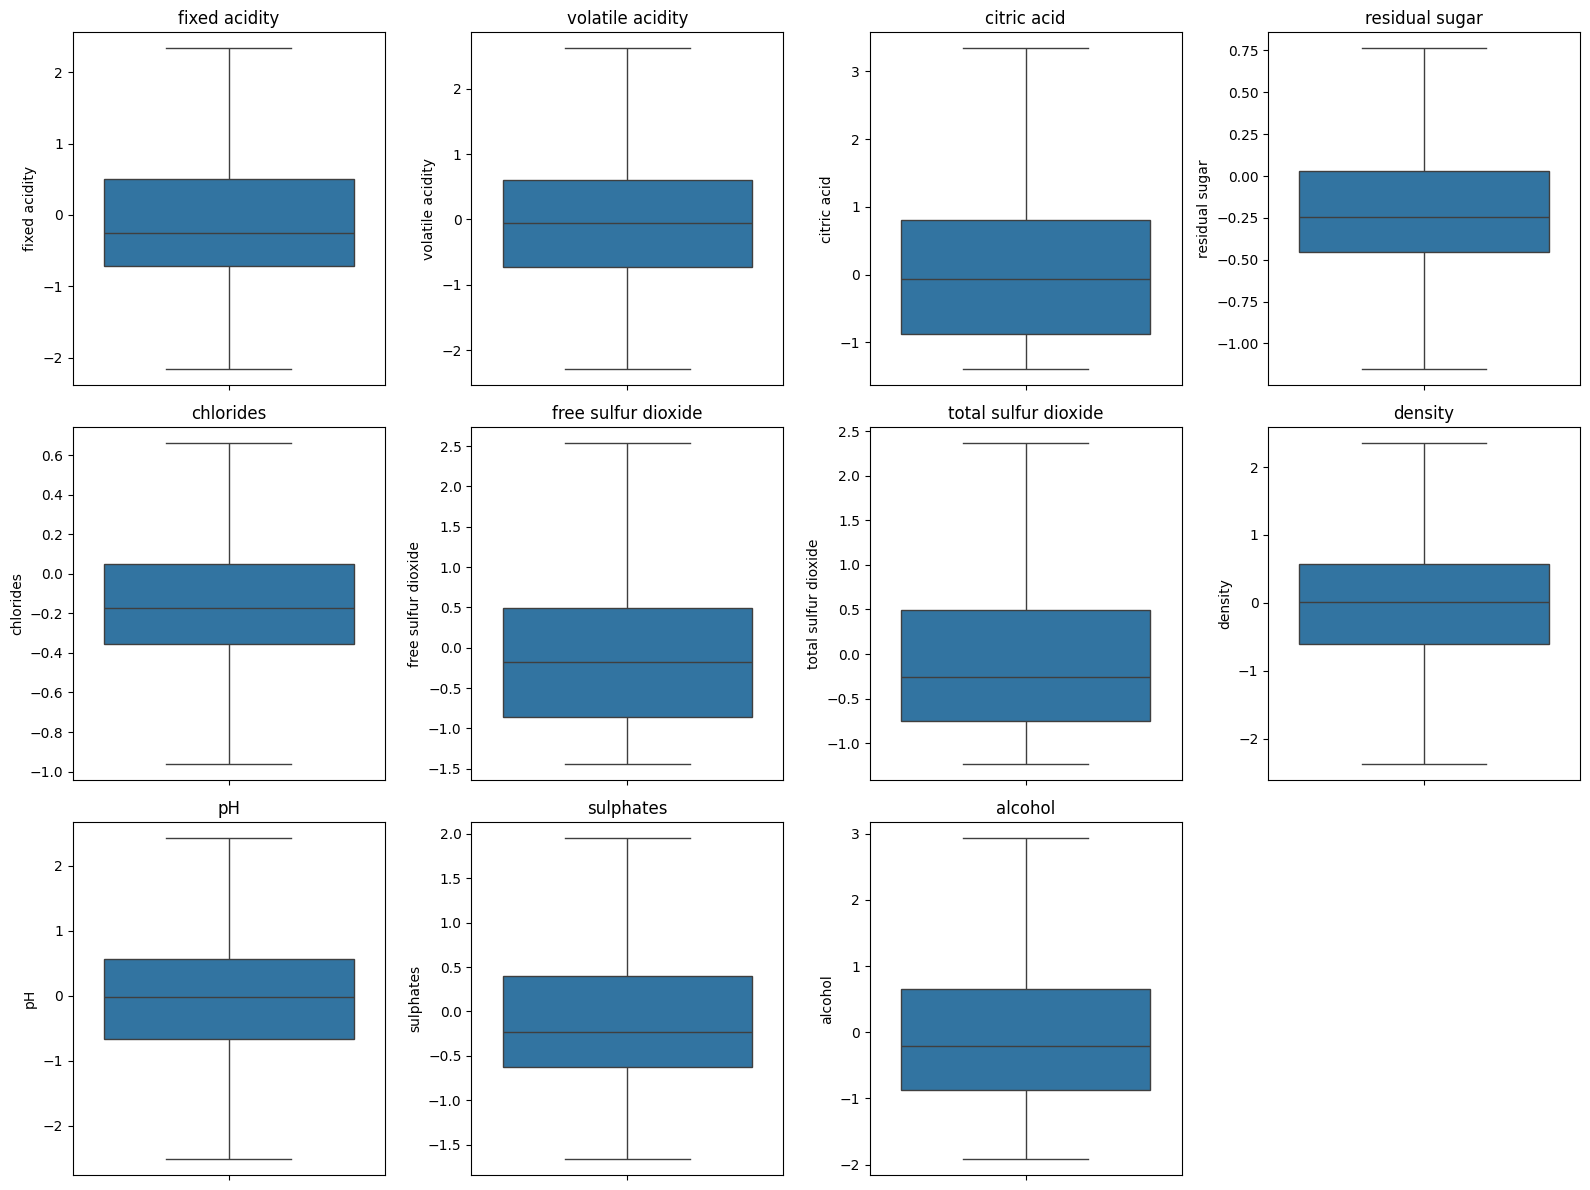

In [19]:
plt.figure(figsize=(16, 4*3))  # adjust rows if needed
for i, col in enumerate(x_train_clipped.columns, 1):
    plt.subplot(3, 4, i)  # 3 rows, 4 cols (adjust based on number of features)
    sns.boxplot(y=x_train_clipped[col])
    plt.title(col)

plt.tight_layout()
plt.show()

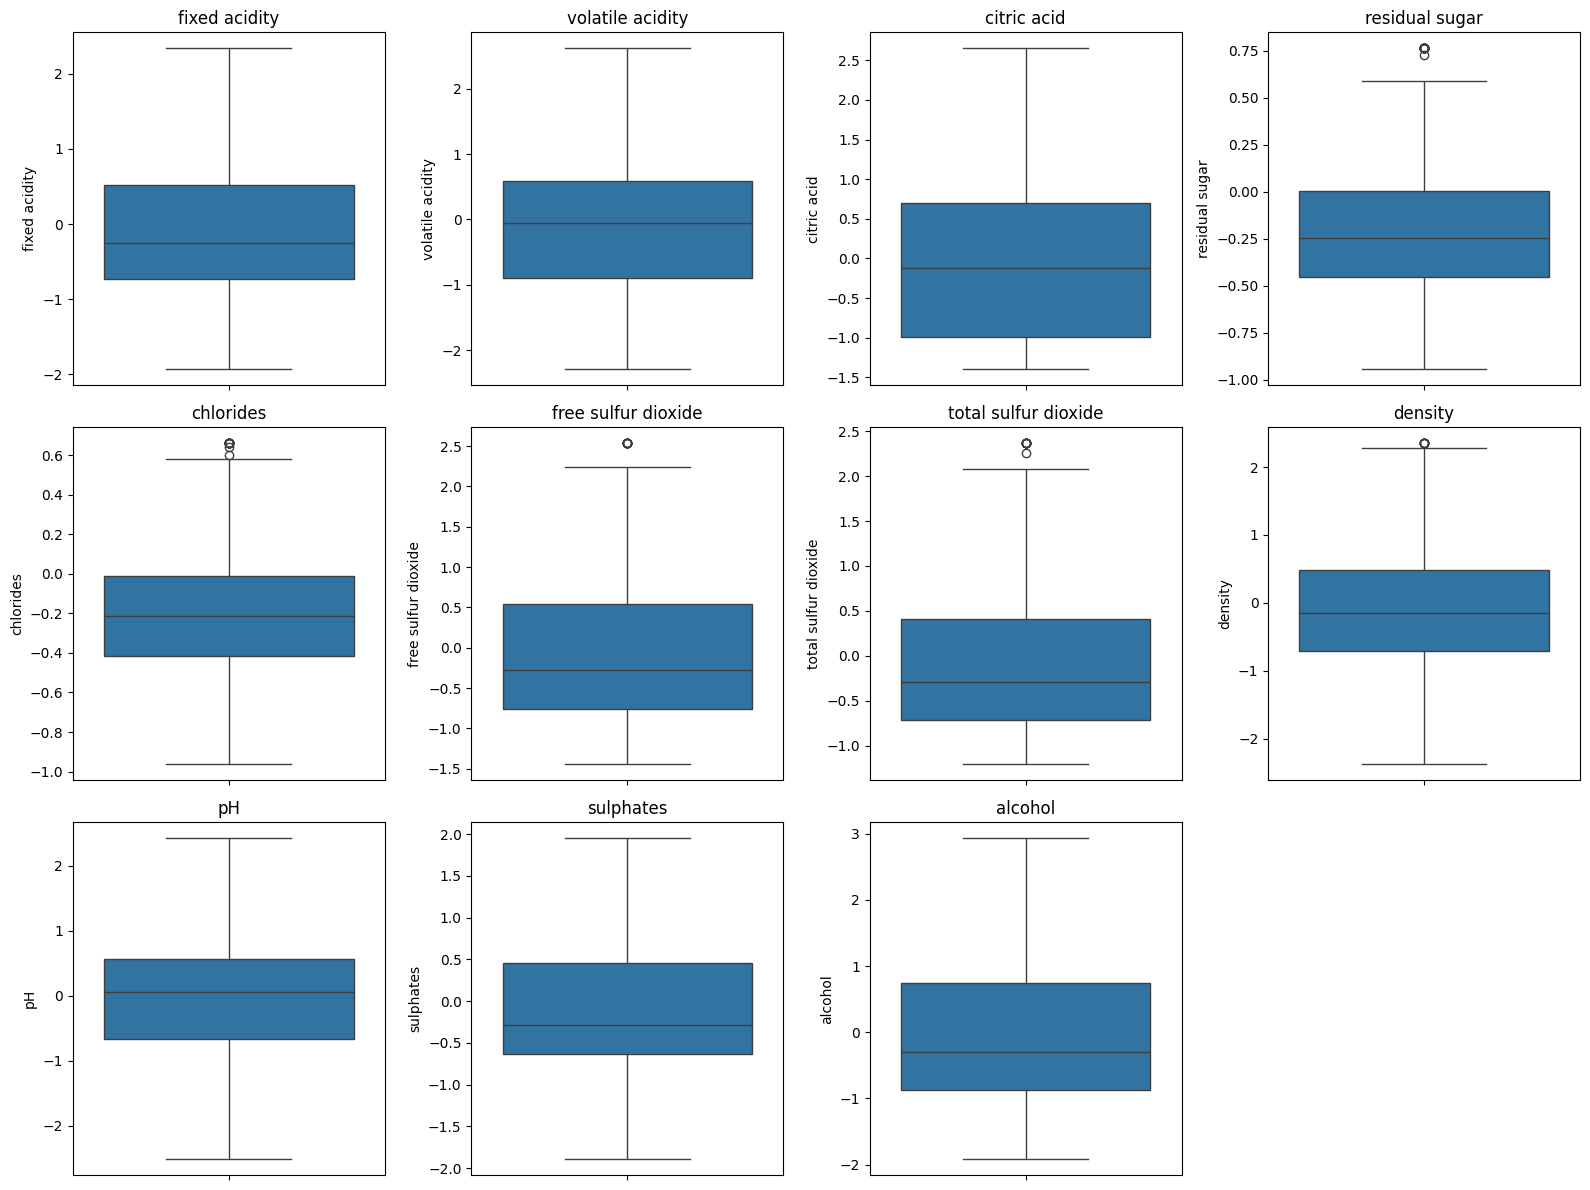

In [20]:
plt.figure(figsize=(16, 4*3))  # adjust rows if needed
for i, col in enumerate(x_test_clipped.columns, 1):
    plt.subplot(3, 4, i)  # 3 rows, 4 cols (adjust based on number of features)
    sns.boxplot(y=x_test_clipped[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## **Model Fitting**

In [21]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train_clipped,y_train)
y_pred= logit_model.predict(x_test_clipped)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred, average='weighted'))
print('Recall is',recall_score(y_test,y_pred, average='weighted'))
print('F1 Score is',f1_score(y_test,y_pred, average='weighted'))

Accuracy is 0.571875
Precision is 0.5610930735930737
Recall is 0.571875
F1 Score is 0.5478645340421979


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
confusion_matrix(y_test,y_pred)

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  1,  7,  2,  0,  0],
       [ 0,  0, 97, 33,  0,  0],
       [ 0,  0, 47, 76,  9,  0],
       [ 0,  0,  2, 31,  9,  0],
       [ 0,  0,  0,  2,  3,  0]])

## **KNN**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,100)

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train_clipped,y_train)
  y_pred=classifier.predict(x_test_clipped)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

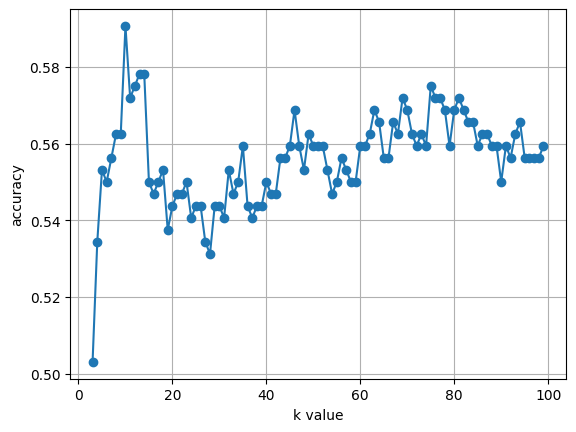

In [25]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [29]:
classifier =KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
classifier.fit(x_train_clipped,y_train)
y_pred=classifier.predict(x_test_clipped)

print('Accuracy:',accuracy_score(y_test,y_pred))
print('Precision:',precision_score(y_test,y_pred, average='weighted'))
print('Recall:',recall_score(y_test,y_pred, average='weighted'))
print('f1 Score:',f1_score(y_test,y_pred, average='weighted'))

Accuracy: 0.590625
Precision: 0.5618110963356975
Recall: 0.590625
f1 Score: 0.5710807597428781


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
